In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import string
import sklearn
from scipy import stats
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score


print(sklearn.__version__)
#=========================#
#Task 1
dfX = pd.read_csv('The Hollywood Inider - all data - 2007-2022.csv')


#This is data from movies released between 2007 and 2022 with the statistics of the movie.#
#This data shows things like genre, gross profits, budgets, etc.#

1.2.2


In [2]:
#Task 2
df = dfX.copy()
#Unneeded columns#
df.drop(['Film'], inplace=True, axis=1)
df.drop(['Script_Type'], inplace=True, axis=1)
df.drop(['Rotten_Tomatoes_vs_Metacritic_deviance'], inplace=True, axis=1)
df.drop(['Foreign_Gross'], inplace=True, axis=1)
df.drop(['Worldwide_Gross'], inplace=True, axis=1)
df.drop(['Budget_recovered'], inplace=True, axis=1)
df.drop(['Budget_recovered_opening_weekend'], inplace=True, axis=1)
df.drop(['Domestic_Gross'], inplace=True, axis=1)
df.drop(['Opening_Weekend'], inplace=True, axis=1)
df.drop(['Primary_Genre'], inplace=True, axis=1)
df.drop(['Audience_vs_Critics_deviance'], inplace=True, axis=1)
df.drop(['Percentage_of_Gross_earned_abroad'], inplace=True, axis=1)

#Catigorical Cleaning#
df['Oscar_Winners'].fillna('0', inplace=True)
for index, i in df['Oscar_Winners'].items():
    df.loc[index, 'Oscar_Winners'] = i.lower()
df['Oscar_Winners'].replace({'oscar winner': 1}, inplace=True)

#NAN Cleaning#
print(df.isnull().sum())
df = df.dropna()
print(df.isnull().sum())
df = df.reset_index(drop=True)

#Data Type Cleaning#
df['Oscar_Winners'] = df['Oscar_Winners'].astype(int)
print(df.dtypes)

#Dummy Data#
df["action"] = np.nan
df["comedy"] = np.nan
df["romance"] = np.nan
df["horror"] = np.nan
df["drama"] = np.nan
df["animation"] = np.nan
catigories = ['comedy', 'romance', 'horror', 'drama', 'animation', 'action']
for cat in catigories:
    for index, genre in df['Genre'].items():
        genre = str(genre).lower()
        if cat in genre:
            df.loc[index,cat] = int(1)
        else:
            df.loc[index,cat] = int(0)
    df[cat] = df[cat].astype(int)

#Target#
budget_regained = ((df['Worldwide_Gross($million)']-df['Budget_($million)'])/(df['Budget_($million)']))*100
succesful = []
for i in budget_regained:
    if i < 150.00:
        succesful.append(0)
    else:
        succesful.append(1)
df['target'] = succesful

#Outlier Cleaning#
num_list = ['Average_critics','Average_audience','Metacritic_Audience','Rotten_Tomatoes _Audience','Metacritic _critics','Rotten_Tomatoes_critics','Opening_weekend($million)','Domestic_gross($million)','Foreign_Gross($million)','Worldwide_Gross($million)','Budget_($million)']
mean1 = np.mean(df['Opening_weekend($million)']) 
thresh = 2
outliers = 0
sd = np.std(df['Opening_weekend($million)'])
for frame in num_list: # for every df in the list if number dfs
    for index, millions in df[frame].items(): #for every million in the colum of the num_list val
        sd = np.std(df[frame]) #create a standard deviation
        mean = np.mean(df[frame]) # creat a mean
        z = (millions-mean)/sd # z-score calc
        if abs(z) > thresh:  # if its an outliers  
            outliers = outliers+1
            df.drop(index,inplace=True)
df.drop(['Genre'], inplace=True, axis=1)

print(outliers, 'Outliers deleted')
print(df.shape)



Year                           0
Rotten_Tomatoes_critics        6
Metacritic _critics           18
Average_critics               12
Rotten_Tomatoes _Audience      1
Metacritic_Audience           19
Average_audience              11
Genre                         82
Opening_weekend($million)     13
Domestic_gross($million)       6
Foreign_Gross($million)      133
Worldwide_Gross($million)     22
Budget_($million)             74
Oscar_Winners                  0
dtype: int64
Year                         0
Rotten_Tomatoes_critics      0
Metacritic _critics          0
Average_critics              0
Rotten_Tomatoes _Audience    0
Metacritic_Audience          0
Average_audience             0
Genre                        0
Opening_weekend($million)    0
Domestic_gross($million)     0
Foreign_Gross($million)      0
Worldwide_Gross($million)    0
Budget_($million)            0
Oscar_Winners                0
dtype: int64
Year                           int64
Rotten_Tomatoes_critics      float64
Meta

In [3]:
df.head(10)

,Year,Rotten_Tomatoes_critics,Metacritic _critics,Average_critics,Rotten_Tomatoes _Audience,Metacritic_Audience,Average_audience,Opening_weekend($million),Domestic_gross($million),Foreign_Gross($million),Worldwide_Gross($million),Budget_($million),Oscar_Winners,action,comedy,romance,horror,drama,animation,target
1,2007,88.0,76.0,82.0,86.0,73.0,80.0,14.04,53.61,16.17,70.0,50.0,0,0,0,0,0,0,0,0
2,2007,50.0,53.0,52.0,56.0,65.0,61.0,15.95,39.57,35.53,75.0,32.0,0,0,0,0,1,0,0,0
3,2007,54.0,56.0,55.0,82.0,73.0,78.0,3.82,24.34,5.02,29.0,45.0,0,0,0,0,0,0,0,0
6,2007,80.0,76.0,78.0,87.0,75.0,81.0,43.57,130.16,137.74,268.0,100.0,0,0,0,0,0,1,0,1
9,2007,69.0,64.0,67.0,68.0,70.0,69.0,33.01,118.59,27.11,146.0,61.0,0,0,1,0,0,0,0,0
10,2007,82.0,69.0,76.0,73.0,69.0,71.0,9.66,66.66,51.81,118.0,75.0,0,0,0,0,0,1,0,0
12,2007,67.0,62.0,65.0,77.0,81.0,79.0,22.22,80.21,37.55,118.0,20.0,0,0,0,0,0,1,0,1
14,2007,93.0,75.0,84.0,80.0,83.0,82.0,34.44,127.81,212.68,340.0,85.0,0,0,0,0,0,0,0,1
20,2007,82.0,77.0,80.0,87.0,80.0,84.0,11.60,25.04,0.38,25.0,53.0,0,0,0,0,1,0,0,0
21,2007,92.0,81.0,87.0,85.0,75.0,80.0,27.48,118.87,83.68,203.0,75.0,0,0,0,0,0,0,0,1


[  6.44126769  20.97576713   5.40184981  28.65114706   3.45688238
   8.45420484 158.44145474 240.64952853 173.13162744 319.97748634
  43.26767205]

[1.12929799e-02 5.20606305e-06 2.03047673e-02 1.06324724e-07
 6.32674818e-02 3.71833295e-03 5.98950674e-34 4.86183995e-49
 1.01058199e-36 1.06474729e-62 7.50348517e-11]


scores= [ 0.70661765 17.08639706  1.69360769  0.02797315  0.36213235 11.65336134]

P-Value= [4.00568963e-01 3.57172175e-05 1.93126079e-01 8.67171972e-01
 5.47324360e-01 6.40866309e-04]
High p-Values:
Year
Metacritic _critics
comedy
romance
drama
animation


Low r-Values:
Year
Rotten_Tomatoes_critics
Metacritic _critics
Average_critics
Rotten_Tomatoes _Audience
Metacritic_Audience
Average_audience
Oscar_Winners
action
comedy
romance
horror
drama
animation


Final Features:


,Opening_weekend($million),Domestic_gross($million),Foreign_Gross($million),Worldwide_Gross($million),Budget_($million),target
1,14.04,53.61,16.17,70.0,50.0,0
2,15.95,39.57,35.53,75.0,32.0,0
3,3.82,24.34,5.02,29.0,45.0,0
6,43.57,130.16,137.74,268.0,100.0,1
9,33.01,118.59,27.11,146.0,61.0,0
...,...,...,...,...,...,...
1716,16.50,68.30,104.10,172.4,60.0,1
1717,0.20,9.00,2.30,11.3,33.0,0
1720,13.50,50.10,26.50,76.6,20.0,1
1721,17.30,90.20,46.30,136.5,24.0,1


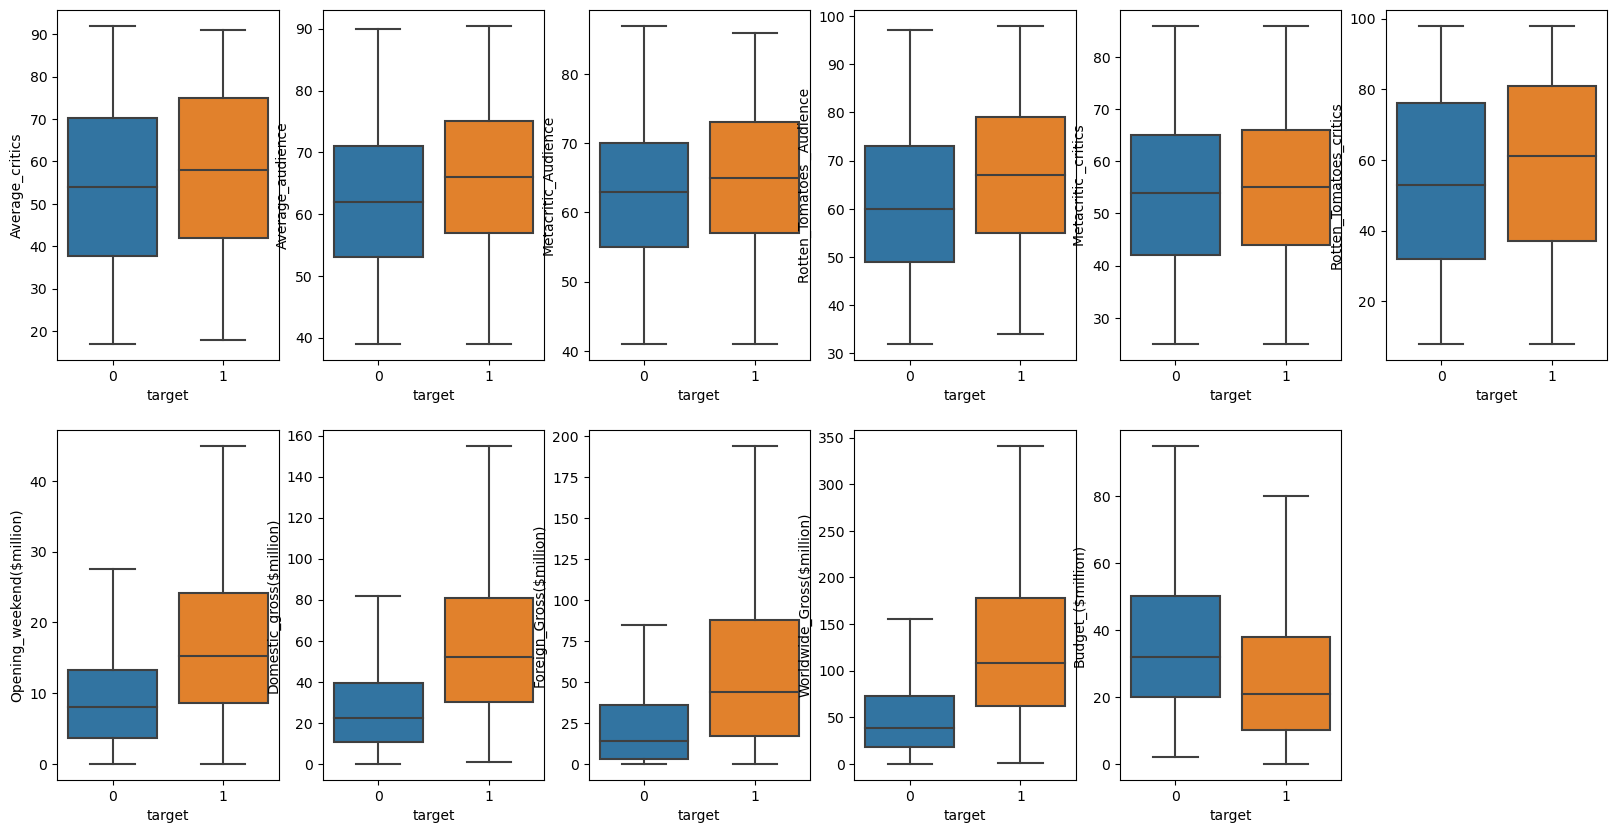

In [4]:
#Task 3#

#Boxplot#
fig=plt.figure(figsize=(20, 10))
for i in range(len(num_list)):
    column=num_list[i]
    sub=fig.add_subplot(2,6,i+1)
    sns.boxplot(x='target',y=column, data=df,showfliers = False )
    
    
#F-score and pValue#
from sklearn.feature_selection import SelectKBest, f_classif, chi2
x = df.loc[:, ['Average_critics','Average_audience','Metacritic_Audience','Rotten_Tomatoes _Audience','Metacritic _critics','Rotten_Tomatoes_critics','Opening_weekend($million)','Domestic_gross($million)','Foreign_Gross($million)','Worldwide_Gross($million)','Budget_($million)']]
y = df.loc[:, 'target']
fs = SelectKBest(score_func=f_classif, k='all') 
bestFeatures = fs.fit(x, y)
print(bestFeatures.scores_) 
print()
print(bestFeatures.pvalues_)
print()
print()


#Chi test#
x = df.loc[:, ['animation','horror','drama', 'romance', 'comedy', 'Oscar_Winners']]
y = df.loc[:, 'target']
chi = SelectKBest(score_func=chi2, k='all')
catFeatures = chi.fit(x, y)
print('scores=',catFeatures.scores_)
print()
print('P-Value=',catFeatures.pvalues_)
#R and P value filter#
corr_df = pd.DataFrame(columns=['r-Val','p-Val'])
for col in df:
    if pd.api.types.is_numeric_dtype(df[col]):
        r,p = stats.pearsonr(df.target, df[col])
        corr_df.loc[col] = [round(r,3), round(p,5)]
print('High p-Values:')
for index, row in corr_df['p-Val'].items():
    if row >0.05:
        print(index)
print()
print()
print('Low r-Values:')
for index, row in corr_df['r-Val'].items():
    if row>0 and row<0.198:
        print(index)
        df.drop([index], inplace=True, axis=1)
    elif row<0 and row>(-0.198):
        print(index)
        df.drop([index], inplace=True, axis=1)
        
print()
print()
print('Final Features:')
df
#==>Any features Irrelevant to the target variable?<==#
# yes, most features or not rellevant, they are listed in output.

#==>Any high-correlated Features?<==#
# not in particular.

#==>Does this algorithm require normalized data or standardized data?<==#
# standard should work fine.

#==>Are there any categorical variables need to be changed to dummy variables?<==#
# yes, Genre specifically needed dummy variables, but the ended up not being rellevant.



In [5]:
#Task 4
from sklearn.tree import DecisionTreeClassifier
x = df.loc[:, df.columns!='target']
y = df['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0, stratify=y)   

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
ac = accuracy_score(y_test,y_pred)
print(ac)
#==>Does this data need to be balanced?<==#
# not really, but the result was better when using oversampling

#==>Do you use train_test_split or cross validation to validate the result?<==#
#Train_Test_Split

#==>Which algorithm is appropriate for this problem?<==#
# with how high the accuracy is, i think

#==>Which metrics do you use to evaluate the prediction model?<==#
# accuracy 

#==>If the accuracy score or r-squared score is low, generally it is considered as a bad<==#
#==>Explain why your model failed.<==#
#i believe i succeded in my prediction model since the accuracy score from 2 seperate evvaluations is over 90%

0.9463722397476341


In [6]:
os = SMOTE(random_state=0)
oversampled_x,oversampled_y=os.fit_resample(x_train, y_train)

print(x_train.shape)
print(oversampled_x.shape)

LogRegression = LogisticRegression(penalty='none', max_iter=2000)
LogRegression.fit(oversampled_x, oversampled_y.values.ravel())

test_pred = LogRegression.predict(x_test)
accuracy_score(y_test, test_pred)

(739, 5)
(762, 5)


C:\Users\14704\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


0.9968454258675079